In [1]:
# Importamos todos los paquetes que vamos a necesitar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

In [85]:
# cargamos nuestro dataset
data = pd.read_csv('datasets/fallecidos_covid.csv', engine = 'python', sep=';')

In [86]:
data.head()

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210220,10be23dc2d9ed258be9bbb086a8c99a9,20200511,62,FEMENINO,19580311.0,LIMA,LIMA,MAGDALENA DEL MAR
1,20210220,1cb3e2064fdd925369f547795a6b5f8f,20200429,55,MASCULINO,19641220.0,LORETO,MAYNAS,IQUITOS
2,20210220,0a226f18516d5fb46842551f9dd380b4,20200508,67,MASCULINO,NaN,CALLAO,NaN,CALLAO
3,20210220,b9a28aa80bb40f0288e1dc873a885b66,20200506,77,MASCULINO,NaN,LORETO,NaN,NaN
4,20210220,d518d078409c2289987786adcc163b32,20200511,81,MASCULINO,19380717.0,LIMA,LIMA,SAN JUAN DE MIRAFLORES


<AxesSubplot:xlabel='SEXO', ylabel='count'>

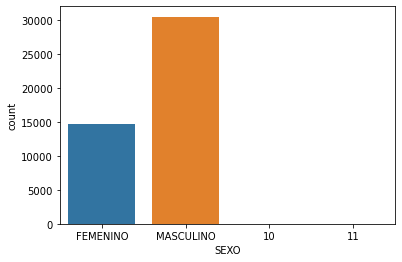

In [87]:
# Visualizar grafico de barras según el sexo
sns.countplot(x='SEXO', data=data)

In [88]:
# Cambiando el 10 por Femenino
filter1 = data["SEXO"] == '10'
filter1

0        False
1        False
2        False
3        False
4        False
         ...  
45092    False
45093    False
45094    False
45095    False
45096    False
Name: SEXO, Length: 45097, dtype: bool

In [90]:
data['SEXO'] = np.where(filter1, 'FEMENINO', data['SEXO'])

In [94]:
# cambiando el 11 por masculino
filter2 = data["SEXO"] == '11'
data['SEXO'] = np.where(filter2, 'MASCULINO', data['SEXO'])

<AxesSubplot:xlabel='SEXO', ylabel='count'>

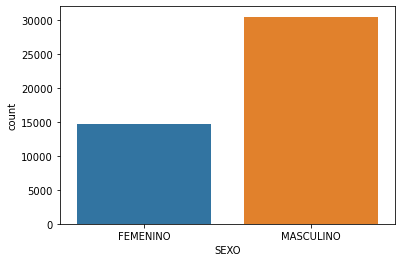

In [95]:
# Visualizar grafico de barras según el sexo
sns.countplot(x='SEXO', data=data)

In [96]:
data['EDAD_DECLARADA'].mean()

65.92635873783179

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EDAD_DECLARADA', ylabel='Density'>

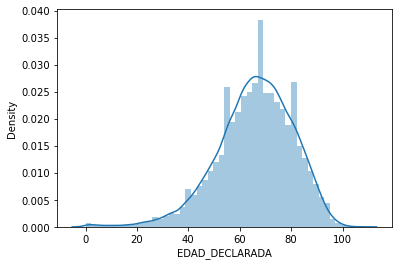

In [7]:
sns.distplot(data['EDAD_DECLARADA'])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45097 entries, 0 to 45096
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA_CORTE          45097 non-null  int64  
 1   UUID                 45097 non-null  object 
 2   FECHA_FALLECIMIENTO  45097 non-null  int64  
 3   EDAD_DECLARADA       45097 non-null  int64  
 4   SEXO                 45097 non-null  object 
 5   FECHA_NAC            31747 non-null  float64
 6   DEPARTAMENTO         45097 non-null  object 
 7   PROVINCIA            44246 non-null  object 
 8   DISTRITO             44776 non-null  object 
 9   ANIO                 45097 non-null  object 
 10  MES                  3 non-null      object 
dtypes: float64(1), int64(3), object(7)
memory usage: 3.8+ MB


In [107]:
data['FECHA_FALLECIMIENTO'] = pd.to_datetime(data['FECHA_FALLECIMIENTO'], format='%Y%m%d')

In [125]:
data['ANIO'] = data['FECHA_FALLECIMIENTO'].dt.year
data['MES'] = data['FECHA_FALLECIMIENTO'].dt.month 
data['DIA'] = data['FECHA_FALLECIMIENTO'].dt.day
data['VALOR'] = 1

In [126]:
data.head()

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO,ANIO,MES,DIA,valor,VALOR
0,20210220,10be23dc2d9ed258be9bbb086a8c99a9,2020-05-11,62,FEMENINO,19580311.0,LIMA,LIMA,MAGDALENA DEL MAR,2020,5,11,1,1
1,20210220,1cb3e2064fdd925369f547795a6b5f8f,2020-04-29,55,MASCULINO,19641220.0,LORETO,MAYNAS,IQUITOS,2020,4,29,1,1
2,20210220,0a226f18516d5fb46842551f9dd380b4,2020-05-08,67,MASCULINO,NaN,CALLAO,NaN,CALLAO,2020,5,8,1,1
3,20210220,b9a28aa80bb40f0288e1dc873a885b66,2020-05-06,77,MASCULINO,NaN,LORETO,NaN,NaN,2020,5,6,1,1
4,20210220,d518d078409c2289987786adcc163b32,2020-05-11,81,MASCULINO,19380717.0,LIMA,LIMA,SAN JUAN DE MIRAFLORES,2020,5,11,1,1


<AxesSubplot:xlabel='ANIO', ylabel='count'>

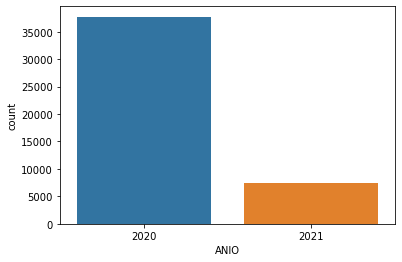

In [127]:
# Visualizar grafico de barras según el año
sns.countplot(x='ANIO', data=data)

In [129]:
# mapa de calor
vuelos_matrix = data.pivot_table(index='MES', columns='ANIO', values='VALOR')
vuelos_matrix

ANIO,2020,2021
MES,,
1,NaN,1.0
2,NaN,1.0
3,1.0,NaN
4,1.0,NaN
5,1.0,NaN
6,1.0,NaN
7,1.0,NaN
8,1.0,NaN
9,1.0,NaN


<AxesSubplot:xlabel='ANIO', ylabel='MES'>

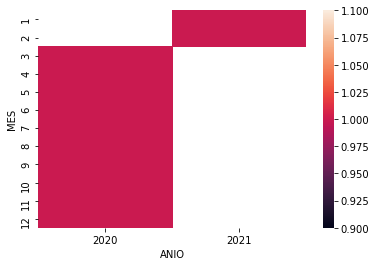

In [130]:
sns.heatmap(vuelos_matrix)

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=propinas,hue='sex')